In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import geopandas as gpd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/indian-stat/Indian_states.shp
/kaggle/input/indian-stat/Indian_states.prj
/kaggle/input/indian-stat/Indian_states.dbf
/kaggle/input/indian-stat/Indian_states.shx
/kaggle/input/pre-cog/judges_clean/judges_clean.csv
/kaggle/input/pre-cog/acts_sections/acts_sections.csv
/kaggle/input/pre-cog/cases/cases_2015.csv
/kaggle/input/pre-cog/cases/cases_2012.csv
/kaggle/input/pre-cog/cases/cases_2018.csv
/kaggle/input/pre-cog/cases/cases_2013.csv
/kaggle/input/pre-cog/cases/cases_2017.csv
/kaggle/input/pre-cog/cases/cases_2010.csv
/kaggle/input/pre-cog/cases/cases_2014.csv
/kaggle/input/pre-cog/cases/cases_2016.csv
/kaggle/input/pre-cog/cases/cases_2011.csv
/kaggle/input/pre-cog/keys/type_name_key.csv
/kaggle/input/pre-cog/keys/cases_district_key.csv
/kaggle/input/pre-cog/keys/act_key.csv
/kaggle/input/pre-cog/keys/disp_name_key.csv
/kaggle/input/pre-cog/keys/purpose_name_key.csv
/kaggle/input/pre-cog/keys/cases_state_key.csv
/kaggle/input/pre-cog/keys/section_key.csv
/kaggle/input/

In [2]:
case = pd.read_csv('/kaggle/input/pre-cog/cases/cases_2013.csv')
print(case.head())

                ddl_case_id  year  state_code  dist_code  court_no  \
0  01-01-01-201907002392013  2013           1          1         1   
1  01-01-01-201908000012013  2013           1          1         1   
2  01-01-01-201908000022013  2013           1          1         1   
3  01-01-01-201908000032013  2013           1          1         1   
4  01-01-01-201908000042013  2013           1          1         1   

               cino             judge_position female_defendant  \
0  MHNB030009652013  chief judicial magistrate    -9998 unclear   
1  MHNB030000112013  chief judicial magistrate           0 male   
2  MHNB030000132013  chief judicial magistrate    -9998 unclear   
3  MHNB030000182013  chief judicial magistrate           0 male   
4  MHNB030000202013  chief judicial magistrate           0 male   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0          1 female               1               1     1919.0        2366.0   
1            0 m

In [3]:
acts_sec = pd.read_csv('/kaggle/input/pre-cog/acts_sections/acts_sections.csv')

mer_1 = case.merge(acts_sec, left_on = "ddl_case_id", right_on = "ddl_case_id", how = "left")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
print(mer_1.iloc[900403:900440,:])

                     ddl_case_id  year  state_code  dist_code  court_no  \
900403  01-34-03-203403013692013  2013           1         34         3   
900404  01-34-03-203403013702013  2013           1         34         3   
900405  01-34-03-203403013712013  2013           1         34         3   
900406  01-34-03-203403013722013  2013           1         34         3   
900407  01-34-03-203403013732013  2013           1         34         3   
900408  01-34-03-203403013742013  2013           1         34         3   
900409  01-34-03-203403013752013  2013           1         34         3   
900410  01-34-03-203403013762013  2013           1         34         3   
900411  01-34-03-203403013802013  2013           1         34         3   
900412  01-34-03-203403013882013  2013           1         34         3   
900413  01-34-03-203403013912013  2013           1         34         3   
900414  01-34-03-203403013922013  2013           1         34         3   
900415  01-34-03-20340301

In [5]:
mer_1.to_csv('cases_2013_mer.csv', index="false")

In [6]:
state = pd.read_csv('/kaggle/input/pre-cog/keys/cases_state_key.csv')

In [7]:
state_arr = state[state.columns[1:3]].values.tolist()
set(tuple(element) for element in state_arr)
state_x = [list(t) for t in set(tuple(element) for element in state_arr)]

In [8]:
print(state_x)

[[7, 'Jharkhand'], [23, 'Madhya Pradesh'], [29, 'Telangana'], [24, 'Sikkim'], [22, 'Punjab'], [27, 'Chandigarh'], [31, 'Diu and Daman'], [14, 'Haryana'], [20, 'Tripura'], [19, 'Mizoram'], [16, 'West Bengal'], [6, 'Assam'], [25, 'Manipur'], [26, 'Delhi'], [11, 'Orissa'], [13, 'Uttar Pradesh'], [2, 'Andhra Pradesh'], [21, 'Meghalaya'], [15, 'Uttarakhand'], [17, 'Gujarat'], [33, 'Ladakh'], [4, 'Kerala'], [8, 'Bihar'], [18, 'Chhattisgarh'], [10, 'Tamil Nadu'], [1, 'Maharashtra'], [30, 'Goa'], [12, 'Jammu and Kashmir'], [32, 'DNH at Silvasa'], [5, 'Himachal Pradesh'], [9, 'Rajasthan'], [3, 'Karnataka']]


In [9]:
states = pd.DataFrame(state_x, columns = ['state_code', 'state'])

In [10]:
print(states)

    state_code              state
0            7          Jharkhand
1           23     Madhya Pradesh
2           29          Telangana
3           24             Sikkim
4           22             Punjab
5           27         Chandigarh
6           31      Diu and Daman
7           14            Haryana
8           20            Tripura
9           19            Mizoram
10          16        West Bengal
11           6              Assam
12          25            Manipur
13          26              Delhi
14          11             Orissa
15          13      Uttar Pradesh
16           2     Andhra Pradesh
17          21          Meghalaya
18          15        Uttarakhand
19          17            Gujarat
20          33             Ladakh
21           4             Kerala
22           8              Bihar
23          18       Chhattisgarh
24          10         Tamil Nadu
25           1        Maharashtra
26          30                Goa
27          12  Jammu and Kashmir
28          32

In [11]:
mer_2 = mer_1.merge(states, left_on = "state_code", right_on = "state_code", how = "left")

In [12]:
print(mer_2.iloc[899394:900001,:])

                     ddl_case_id  year  state_code  dist_code  court_no  \
899394  01-34-03-203403001172013  2013           1         34         3   
899395  01-34-03-203403001182013  2013           1         34         3   
899396  01-34-03-203403001192013  2013           1         34         3   
899397  01-34-03-203403001202013  2013           1         34         3   
899398  01-34-03-203403001242013  2013           1         34         3   
...                          ...   ...         ...        ...       ...   
899996  01-34-03-203403008662013  2013           1         34         3   
899997  01-34-03-203403008672013  2013           1         34         3   
899998  01-34-03-203403008682013  2013           1         34         3   
899999  01-34-03-203403008692013  2013           1         34         3   
900000  01-34-03-203403008702013  2013           1         34         3   

                    cino             judge_position female_defendant  \
899394  MHKO030002862013  c

In [13]:
state_count = mer_2.groupby('state').count().reset_index()

In [14]:
print(state_count)

                state  ddl_case_id     year  state_code  dist_code  court_no  \
0      Andhra Pradesh       195473   195473      195473     195473    195473   
1               Assam       111690   111690      111690     111690    111690   
2               Bihar       286735   286735      286735     286735    286735   
3          Chandigarh        24487    24487       24487      24487     24487   
4        Chhattisgarh        59888    59888       59888      59888     59888   
5      DNH at Silvasa         1416     1416        1416       1416      1416   
6               Delhi       146827   146827      146827     146827    146827   
7       Diu and Daman         1391     1391        1391       1391      1391   
8                 Goa        29499    29499       29499      29499     29499   
9             Gujarat       569400   569400      569400     569400    569400   
10            Haryana       285856   285856      285856     285856    285856   
11   Himachal Pradesh        69771    69

In [15]:
state_count.replace("Orissa", 
           "Odisha", 
           inplace=True)

state_count.replace("DNH at Silvasa", 
           "Dadara & Nagar Havelli", 
           inplace=True)

state_count.replace("Diu and Daman", 
           "Daman & Diu", 
           inplace=True)

state_count.replace("Jammu and Kashmir", 
           "Jammu & Kashmir", 
           inplace=True)

state_count.replace("Delhi", 
           "NCT of Delhi", 
           inplace=True)

print(state_count)

                     state  ddl_case_id     year  state_code  dist_code  \
0           Andhra Pradesh       195473   195473      195473     195473   
1                    Assam       111690   111690      111690     111690   
2                    Bihar       286735   286735      286735     286735   
3               Chandigarh        24487    24487       24487      24487   
4             Chhattisgarh        59888    59888       59888      59888   
5   Dadara & Nagar Havelli         1416     1416        1416       1416   
6             NCT of Delhi       146827   146827      146827     146827   
7              Daman & Diu         1391     1391        1391       1391   
8                      Goa        29499    29499       29499      29499   
9                  Gujarat       569400   569400      569400     569400   
10                 Haryana       285856   285856      285856     285856   
11        Himachal Pradesh        69771    69771       69771      69771   
12         Jammu & Kashmi

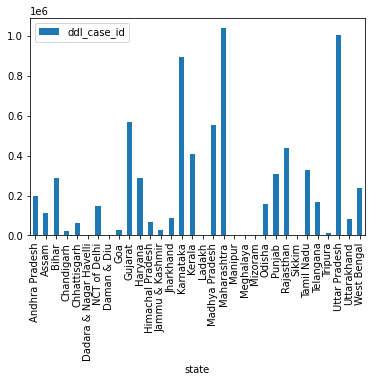

In [16]:
state_count.plot(x="state",y="ddl_case_id", kind="bar")
plt.pyplot.savefig('state_bar_2013.png')

In [17]:
shp = gpd.read_file('/kaggle/input/indian-stat/Indian_states.shp')
state_map = shp.set_index('st_nm').join(state_count.set_index('state'))
print(state_map)

                                                                   geometry  \
st_nm                                                                         
Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...   
Arunanchal Pradesh        POLYGON ((96.16261 29.38078, 96.16860 29.37432...   
Assam                     MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...   
Bihar                     MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...   
Chandigarh                POLYGON ((76.84147 30.75996, 76.83599 30.73623...   
Chhattisgarh              POLYGON ((83.33532 24.09885, 83.35346 24.09627...   
Dadara & Nagar Havelli    POLYGON ((73.20657 20.12216, 73.20797 20.10650...   
Daman & Diu               MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...   
Goa                       MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...   
Gujarat                   MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...   
Haryana                   POLYGON ((76.85065 30.8751

In [18]:
 state_map['ddl_case_id'] = state_map['ddl_case_id'].fillna(0)

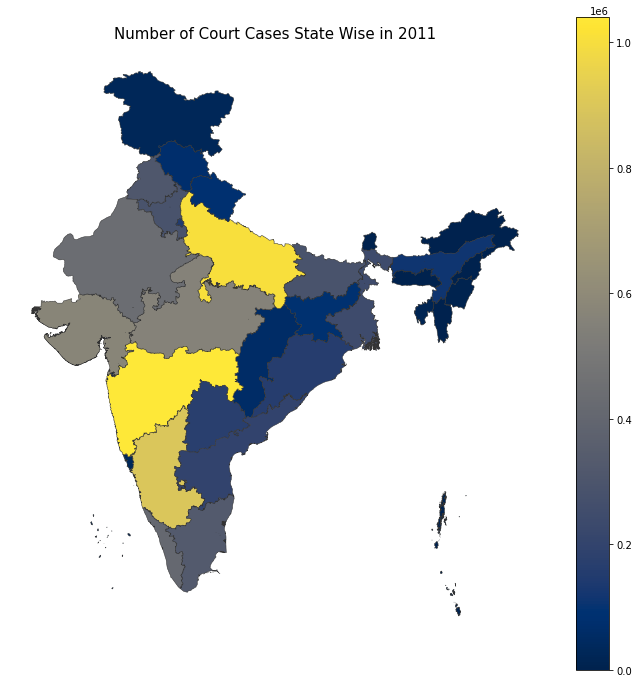

In [19]:
fig, ax = plt.pyplot.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Number of Court Cases State Wise in 2011',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = state_map.plot(column='ddl_case_id', cmap='cividis', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

plt.pyplot.savefig('state_map_2013.png')

In [20]:
state_2013 = state_map.iloc[:,[1]]
print(state_2013)

                          ddl_case_id
st_nm                                
Andaman & Nicobar Island          0.0
Arunanchal Pradesh                0.0
Assam                        111690.0
Bihar                        286735.0
Chandigarh                    24487.0
Chhattisgarh                  59888.0
Dadara & Nagar Havelli         1416.0
Daman & Diu                    1391.0
Goa                           29499.0
Gujarat                      569400.0
Haryana                      285856.0
Himachal Pradesh              69771.0
Jammu & Kashmir               27459.0
Jharkhand                     87633.0
Karnataka                    896535.0
Kerala                       409259.0
Lakshadweep                       0.0
Madhya Pradesh               556845.0
Maharashtra                 1039581.0
Manipur                        4544.0
Meghalaya                      2027.0
Mizoram                        1308.0
Nagaland                          0.0
NCT of Delhi                 146827.0
Puducherry  

In [21]:
state_2013.to_csv('state_2013.csv')